# Loan Approval Prediction (Classification)

Dataset Link: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

Algorithms: Logistic Regression, XGBoost


## Load Dataset



In [ ]:
import pandas as pd                                                             # for data analysis, cleaning and exploration
import numpy as np                                                              # for numerical operations                        
import matplotlib.pyplot as plt                                                 # for data visualization 
import seaborn as sns                                                           # for statiscal visualization
from sklearn.preprocessing import RobustScaler                                  # for scaling the data
from sklearn.model_selection import train_test_split, GridSearchCV              # for splitting the data and hyperparameter tuning
from sklearn.linear_model import LogisticRegression                             # for logistic regression model
from sklearn.metrics import accuracy_score                                      # for model evaluation                            
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay            # for showing confusion matrix
from sklearn.metrics import classification_report                               # for showing precision, recall, f1-score
from sklearn.metrics import roc_curve, roc_auc_score                            # for roc curve and auc score
from xgboost import XGBClassifier                                               # for XGBoost model           
from sklearn.model_selection import KFold, cross_val_score                      # for cross validation

In [130]:
# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')
data


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


### **Data Description**
**no_of_dependents**: Number of dependents of the applicant  

**education**: Education of the applicant  

**self_employed**: Employment status of the applicant  

**income_annum**: Annual income of the applicant  

**loan_amount**: Loan amount  

**loan_term**: Loan term in years  

**cibil_score**: Credit score  

**residential_assets_value**: Value of residential assets  

**commercial_assets_value**: Value of commercial assets  

**luxury_assets_value**: Value of luxury assets  

**bank_asset_value**: Value of bank assets  

**loan_status**: Loan approval status  

## Data Preprocessing

In [131]:
# remove first column
data = data.drop(data.columns[0], axis=1)
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [132]:
# check for missing values
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [133]:
# info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [134]:
# names of columns
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [135]:
# check for duplicate rows
print("Number of duplicate rows: ", data.duplicated().sum())

Number of duplicate rows:  0


In [136]:
# convert object columns to category
data[' education'] = data[' education'].map({' Not Graduate': 0, ' Graduate': 1})
data[' self_employed'] = data[' self_employed'].map({' No': 0, ' Yes': 1})
data[' loan_status'] = data[' loan_status'].map({' Rejected': 0, ' Approved': 1})


In [137]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## Exploratory Data Analysis

In [138]:
# summary of the dataset
data.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


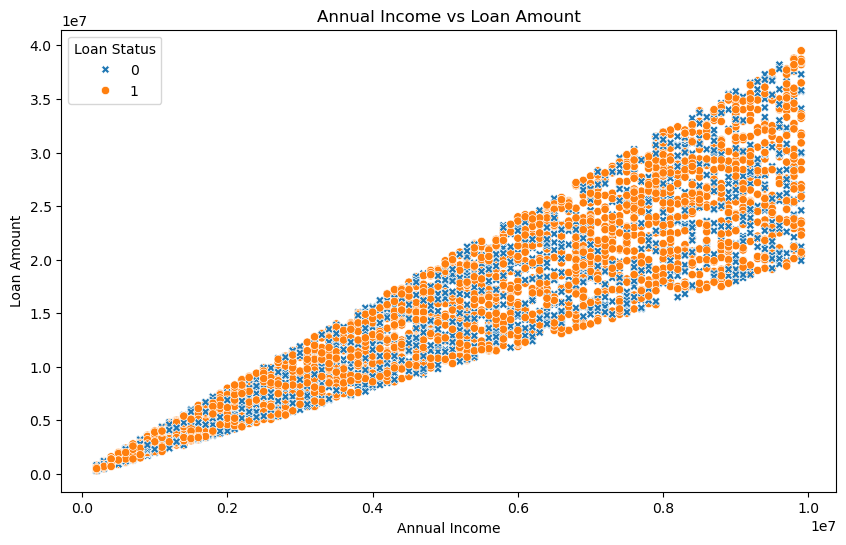

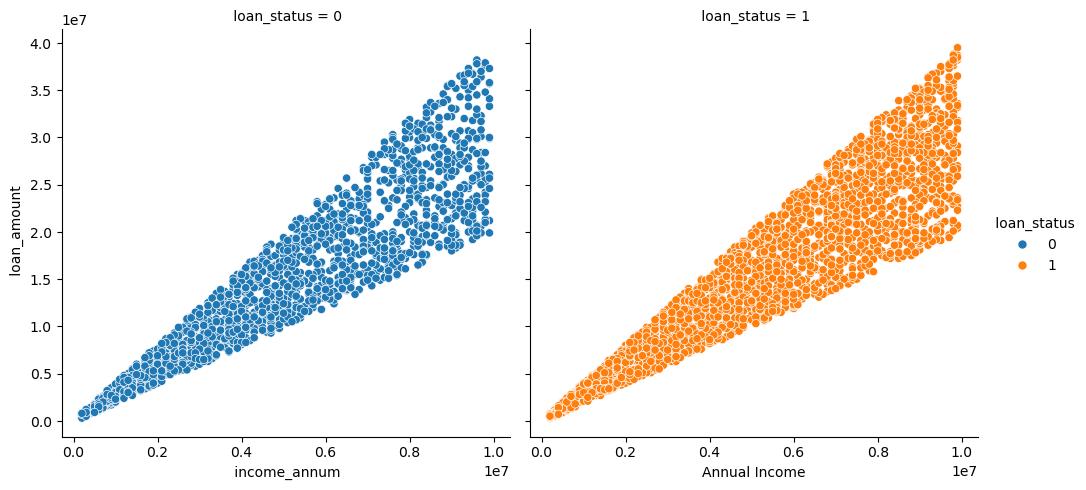

In [183]:
# show relationship between annual income and loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' income_annum', y=' loan_amount', data=data, hue=' loan_status', style=' loan_status', markers={0: 'X', 1: 'o'})
plt.legend(title='Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income vs Loan Amount')
plt.show()

sns.relplot(x=' income_annum', y=' loan_amount', data=data, hue=' loan_status', col=' loan_status', kind='scatter')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()



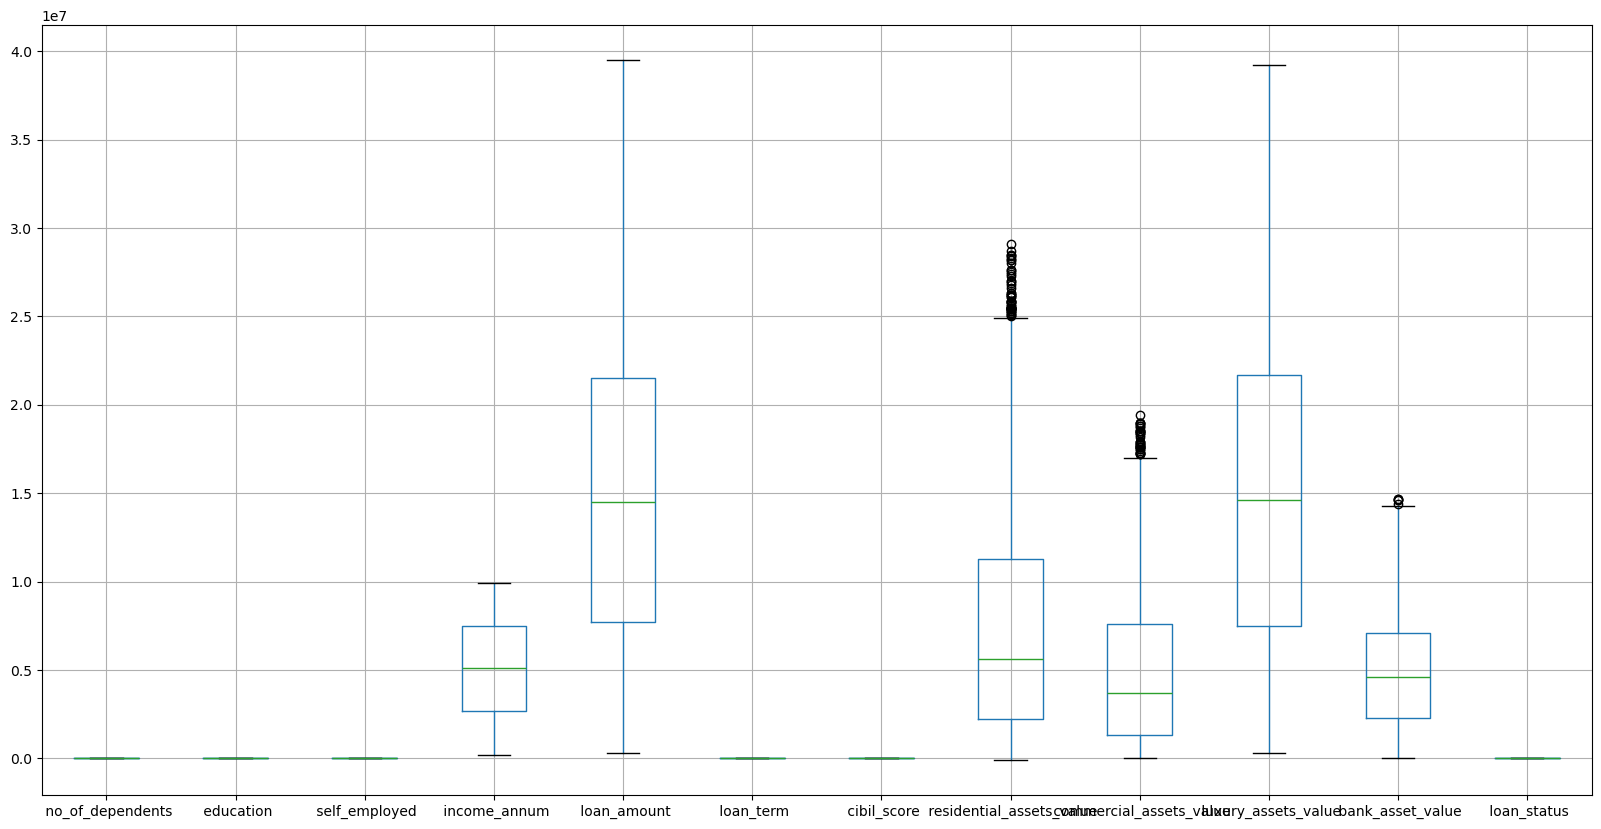

In [139]:
# check for outliers
plt.figure(figsize=(20, 10))
data.boxplot() 
plt.show()


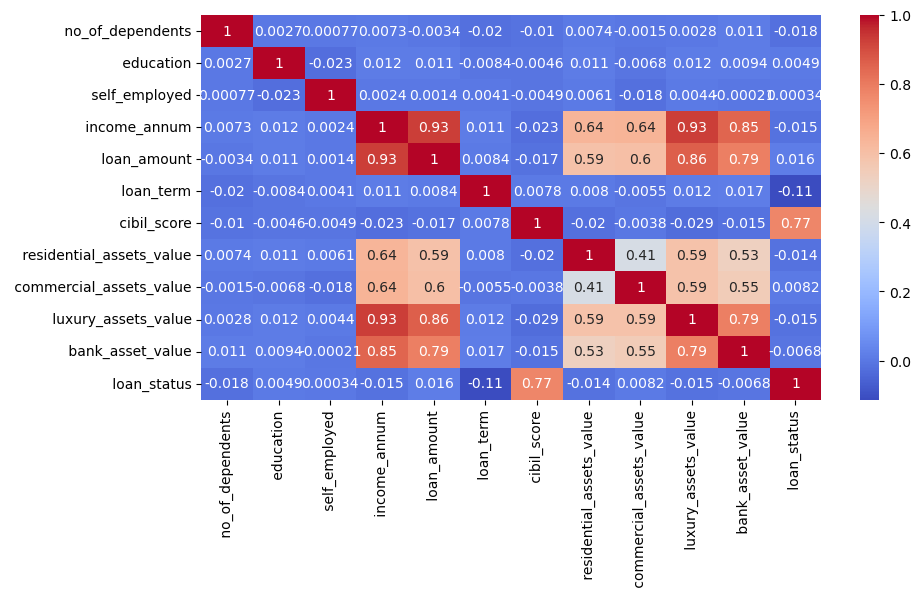

In [140]:
# check for correlation
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [141]:
# standardize the data, using RobustScaler because of the outliers
scaler = RobustScaler()
# scale columns 3 to 10 only
data_scaled = data.copy()
data_scaled.iloc[:, 3:11] = scaler.fit_transform(data.iloc[:, 3:11])

# Ensure the DataFrame has the correct columns
data_scaled.columns = data.columns
data_scaled.head()


C:\Users\mch\AppData\Local\Temp\ipykernel_1988\87173987.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.9375     -0.20833333  0.83333333 ...  0.29166667 -0.20833333
  0.85416667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_scaled.iloc[:, 3:11] = scaler.fit_transform(data.iloc[:, 3:11])
C:\Users\mch\AppData\Local\Temp\ipykernel_1988\87173987.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.11594203 -0.16666667  1.10144928 ...  0.68115942 -0.12318841
  1.10144928]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_scaled.iloc[:, 3:11] = scaler.fit_transform(data.iloc[:, 3:11])
C:\Users\mch\AppData\Local\Temp\ipykernel_1988\87173987.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,0.937500,1.115942,0.2,0.603390,-0.351648,2.206349,0.570423,0.708333,1
1,0,0,1,-0.208333,-0.166667,-0.2,-0.620339,-0.318681,-0.238095,-0.408451,-0.270833,0
2,3,1,0,0.833333,1.101449,1.0,-0.318644,0.164835,0.126984,1.316901,1.708333,0
3,3,1,0,0.645833,1.173913,-0.2,-0.450847,1.384615,-0.063492,0.612676,0.687500,0
4,5,0,1,0.979167,0.702899,1.0,-0.738983,0.747253,0.714286,1.042254,0.083333,0


# Model Training

In [143]:
# split the data into features and target
X = data_scaled.drop(' loan_status', axis=1)
y = data_scaled[' loan_status']

## Logistic Regression

In [144]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3415, 11), (854, 11), (3415,), (854,))

In [ ]:
# train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

## Logistic Regression Model Evaluation

In [146]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9086651053864169

In [147]:
# classification report
report_logistic = classification_report(y_test, y_pred)
print(report_logistic)


              precision    recall  f1-score   support

           0       0.88      0.87      0.88       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



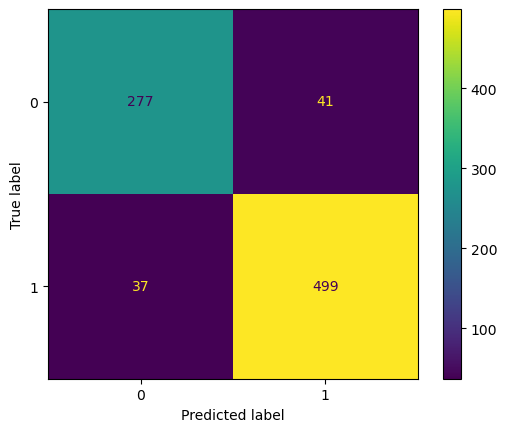

In [148]:
# confusion matrix illustration
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot()
plt.show()

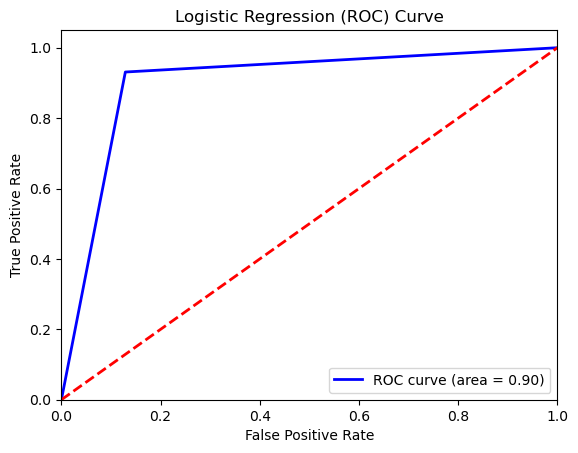

In [149]:
# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [150]:
# use kfold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold)

print("Cross Validation Scores: ", scores)
print("Accuracy: ", scores.mean())


Cross Validation Scores:  [0.90866511 0.90632319 0.92037471 0.91569087 0.93200469]
Accuracy:  0.9166117107000776


## XGBoost

In [151]:
# use xgboost classifier
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [152]:
# make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [153]:
# evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.9824355971896955

In [154]:
# classification report
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



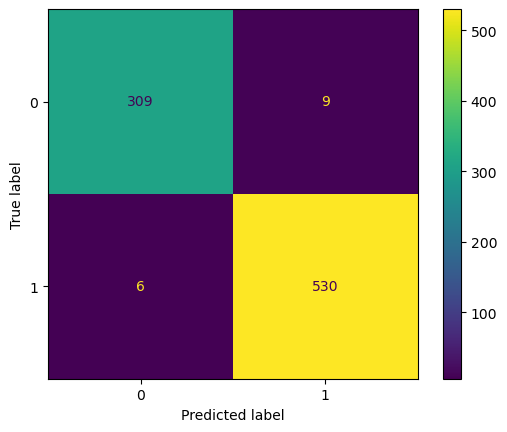

In [155]:
# confusion matrix illustration
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=xgb_model.classes_).plot()
plt.show()

In [156]:
# hyperparameter tuning for xgboost
param_grid = {
    'n_estimators': [10, 25, 50, 100, 150, 200, 300],
    'learning_rate': [0.005, 0.1, 0.01, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.1, 0.01, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 25, 50, 100, 150, 200, 300]},
             scoring='accuracy')

In [157]:
# best parameters
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

In [158]:
better_model = XGBClassifier(**grid_search.best_params_)
better_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [159]:
# make predictions
y_pred_xgb = better_model.predict(X_test)

## XGBoost Model Evaluation

In [160]:
# evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.9789227166276346

In [161]:
# classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



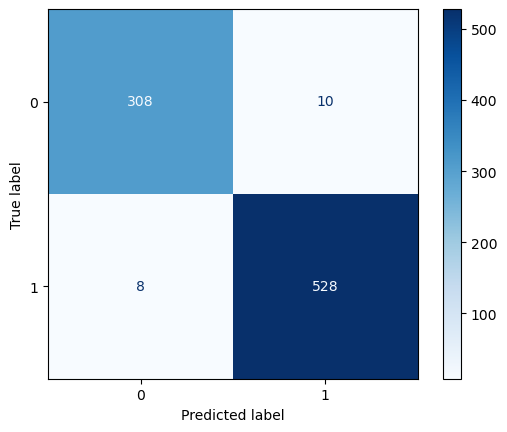

In [162]:
# confusion matrix illustration
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=better_model.classes_).plot(cmap='Blues')
plt.show()

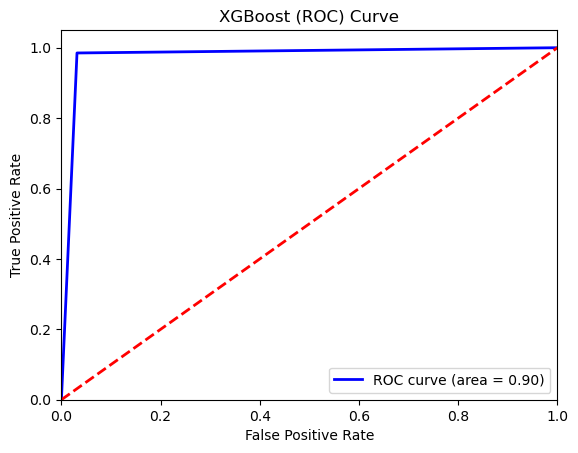

In [163]:
# show roc curve
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [164]:
# cross validation
scores_xgb = cross_val_score(better_model, X, y, cv=kfold)
print("Cross Validation Scores: ", scores_xgb)
print("Accuracy: ", scores_xgb.mean())

Cross Validation Scores:  [0.97892272 0.98711944 0.98126464 0.98594848 0.98710434]
Accuracy:  0.984071921390546


# Model Evaluation

## Comparison between Logistic Regression and XGBoost

Logistic Regression Model Accuracy: 0.9086651053864169
Logistic Regression Model Cross Validation Accuracy: 0.9166117107000776
Logistic Regression Model Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854


XGBoost Model Accuracy: 0.9789227166276346
XGBoost Model Cross Validation Accuracy: 0.984071921390546
XGBoost Model Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854




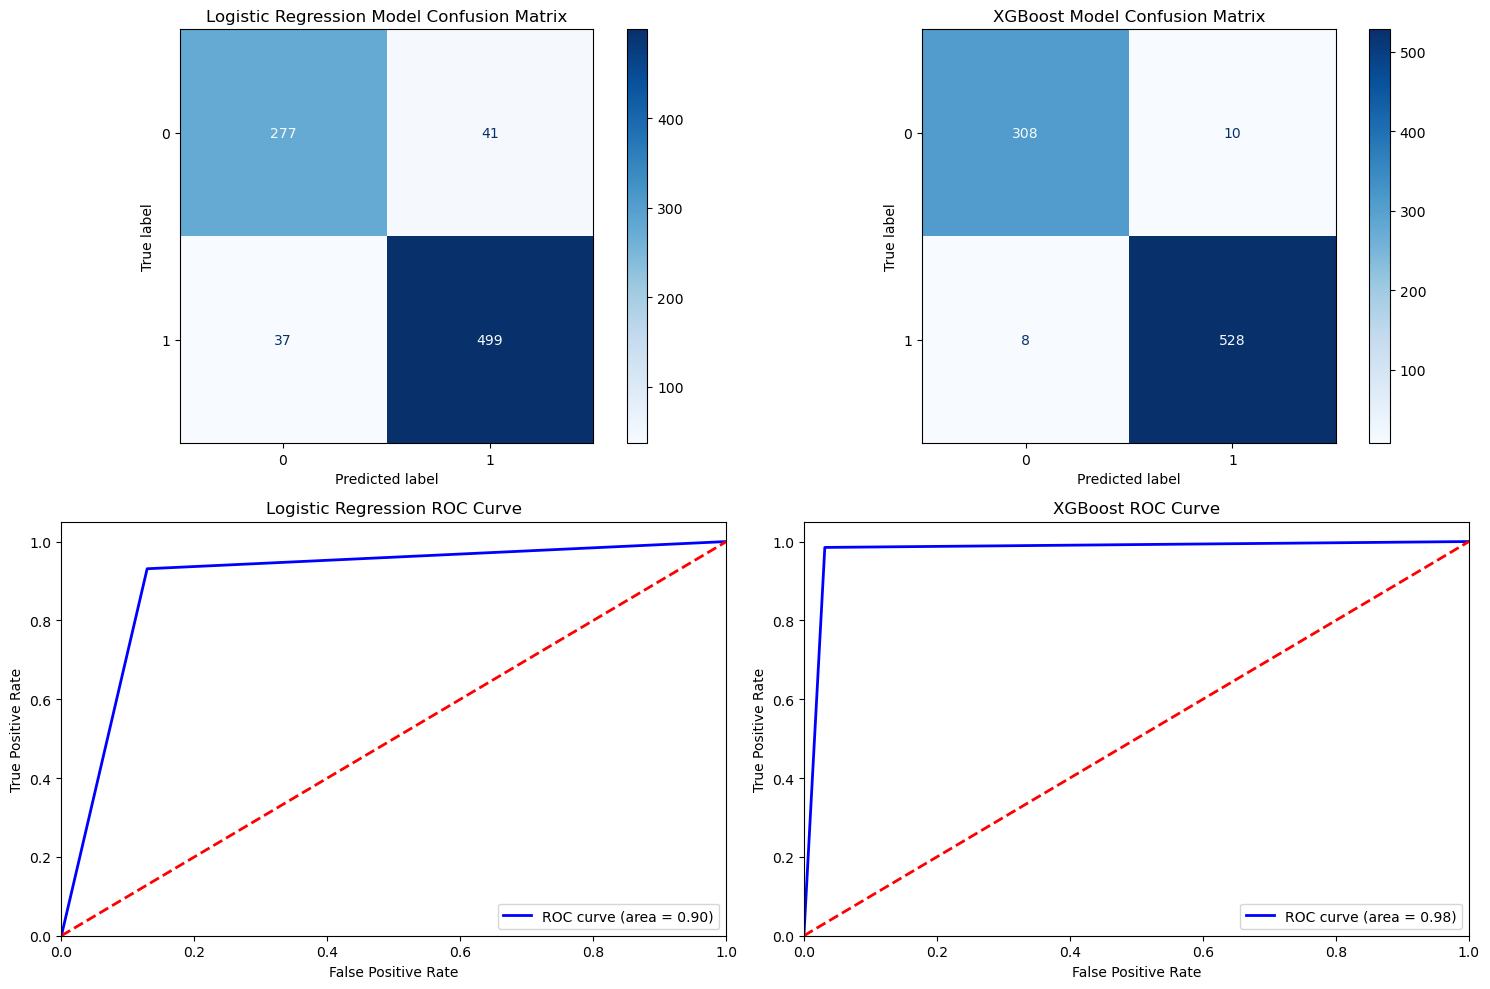

In [166]:
# comparison of models
models = ['Logistic Regression', 'XGBoost']
accuracies = [accuracy, accuracy_xgb]
classification_reports = [report_logistic, report_xgb]
confusion_matrices = [conf_matrix, conf_matrix_xgb]
cross_val_scores = [scores.mean(), scores_xgb.mean()]

for i in range(2):
    print(f'{models[i]} Model Accuracy: {accuracies[i]}')
    print(f'{models[i]} Model Cross Validation Accuracy: {cross_val_scores[i]}')
    print(f'{models[i]} Model Classification Report: \n{classification_reports[i]}\n')
    

# show confusion matrix side by side
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot(ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title('Logistic Regression Model Confusion Matrix')

ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=better_model.classes_).plot(ax=ax[0, 1], cmap='Blues')
ax[0, 1].set_title('XGBoost Model Confusion Matrix')

# plot roc curves
ax[1, 0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1, 0].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax[1, 0].set_xlim([0.0, 1.0])
ax[1, 0].set_ylim([0.0, 1.05])
ax[1, 0].set_xlabel('False Positive Rate')
ax[1, 0].set_ylabel('True Positive Rate')
ax[1, 0].set_title('Logistic Regression ROC Curve')
ax[1, 0].legend(loc='lower right')

ax[1, 1].plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
ax[1, 1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax[1, 1].set_xlim([0.0, 1.0])
ax[1, 1].set_ylim([0.0, 1.05])
ax[1, 1].set_xlabel('False Positive Rate')
ax[1, 1].set_ylabel('True Positive Rate')
ax[1, 1].set_title('XGBoost ROC Curve')
ax[1, 1].legend(loc='lower right')

plt.tight_layout()
plt.show()

